In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [250]:
from sklearn.feature_selection import f_classif,VarianceThreshold ,SelectKBest
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_curve
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_score

In [251]:
import plotly as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline(connected=True)

In [252]:
data = pd.read_csv('diabetes.csv')

In [253]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [254]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

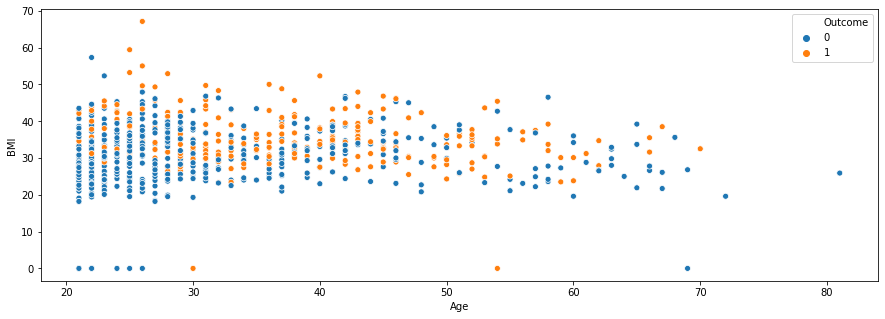

In [255]:
plt.figure(figsize=(15,5))
sns.scatterplot(data['Age'],data['BMI'],hue=data['Outcome'])
plt.show()

In [256]:
Gender = []

for age in data['Age']:
    if age<15:
        Gender.append('Young')
    elif 15<age>=50:
        Gender.append('Elder')
    else:
        Gender.append('Older')

In [257]:
data['Gender'] = Gender

In [258]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,148,72,35,0,33.6,0.627,50,1,Elder
1,1,85,66,29,0,26.6,0.351,31,0,Older
2,8,183,64,0,0,23.3,0.672,32,1,Older
3,1,89,66,23,94,28.1,0.167,21,0,Older
4,0,137,40,35,168,43.1,2.288,33,1,Older


In [259]:
data.shape

(768, 10)

In [260]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
763,10,101,76,48,180,32.9,0.171,63,0,Elder
764,2,122,70,27,0,36.8,0.340,27,0,Older
765,5,121,72,23,112,26.2,0.245,30,0,Older
766,1,126,60,0,0,30.1,0.349,47,1,Older
767,1,93,70,31,0,30.4,0.315,23,0,Older


In [261]:
data['Gender'].value_counts()

Older    679
Elder     89
Name: Gender, dtype: int64

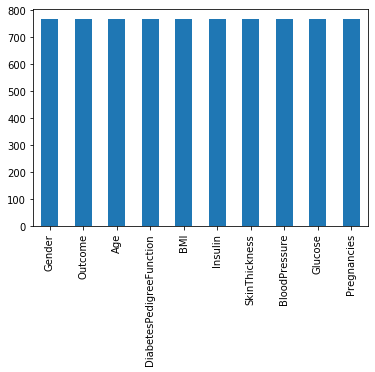

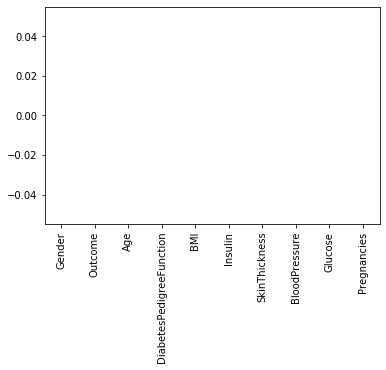

In [262]:
data.notnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.show()
data.isnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [263]:
label = LabelEncoder()

In [264]:
data['Gender'] = label.fit_transform(data['Gender'])

In [265]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


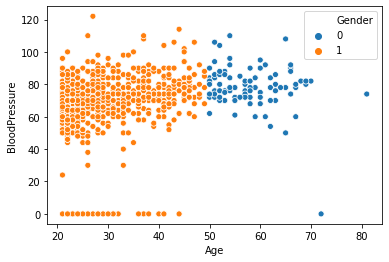

In [266]:
sns.scatterplot(y='BloodPressure',x='Age',hue='Gender',data=data)
plt.show()

In [267]:
x = data.drop(columns=['Outcome'])
y = data['Outcome']

In [268]:
x.shape,y.shape

((768, 9), (768,))

In [269]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,stratify=y,random_state=42)

In [270]:
x_train.shape,x_test.shape

((614, 9), (154, 9))

In [271]:
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

In [272]:
GB = GaussianNB()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
print('Accuracy :-',accuracy_score(y_test,y_pred))

Accuracy :- 0.7142857142857143


In [273]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [274]:
print('y_train with 1 :-',len(y_train[y_train==1]))
print('y_train with 0 :-',len(y_train[y_train==0]))

y_train with 1 :- 214
y_train with 0 :- 400


In [275]:
from imblearn.over_sampling import SMOTE

In [276]:
sm = SMOTE(sampling_strategy=1,random_state=42,k_neighbors=5)
x_train_res,y_train_res = sm.fit_sample(x_train,y_train)

In [277]:
print('y_train_res with 1 :-',len(y_train_res[y_train_res==1]))
print('y_train_res with 0 :-',len(y_train_res[y_train_res==0]))

y_train_res with 1 :- 400
y_train_res with 0 :- 400


In [278]:
GB = GaussianNB()
GB.fit(x_train_res,y_train_res)
Y_pred = GB.predict(x_test)
print('Accuracy :-',accuracy_score(y_test,Y_pred))

Accuracy :- 0.7077922077922078


In [279]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [280]:
print('Accuarcy score for the training data :-',(GB.score(x_train_res,y_train_res))*100)
print('Accuarcy score for the testing data :-',(GB.score(x_test,y_test))*100)

Accuarcy score for the training data :- 72.625
Accuarcy score for the testing data :- 70.77922077922078


In [281]:
estimator= GaussianNB()

In [282]:
val_score = cross_val_score(estimator,x,y,cv=10)

In [283]:
validation_score = val_score.mean()
validation_score = validation_score*100

In [284]:
print('Validation Score :-',validation_score)

Validation Score :- 73.4483937115516


<Figure size 1440x576 with 0 Axes>

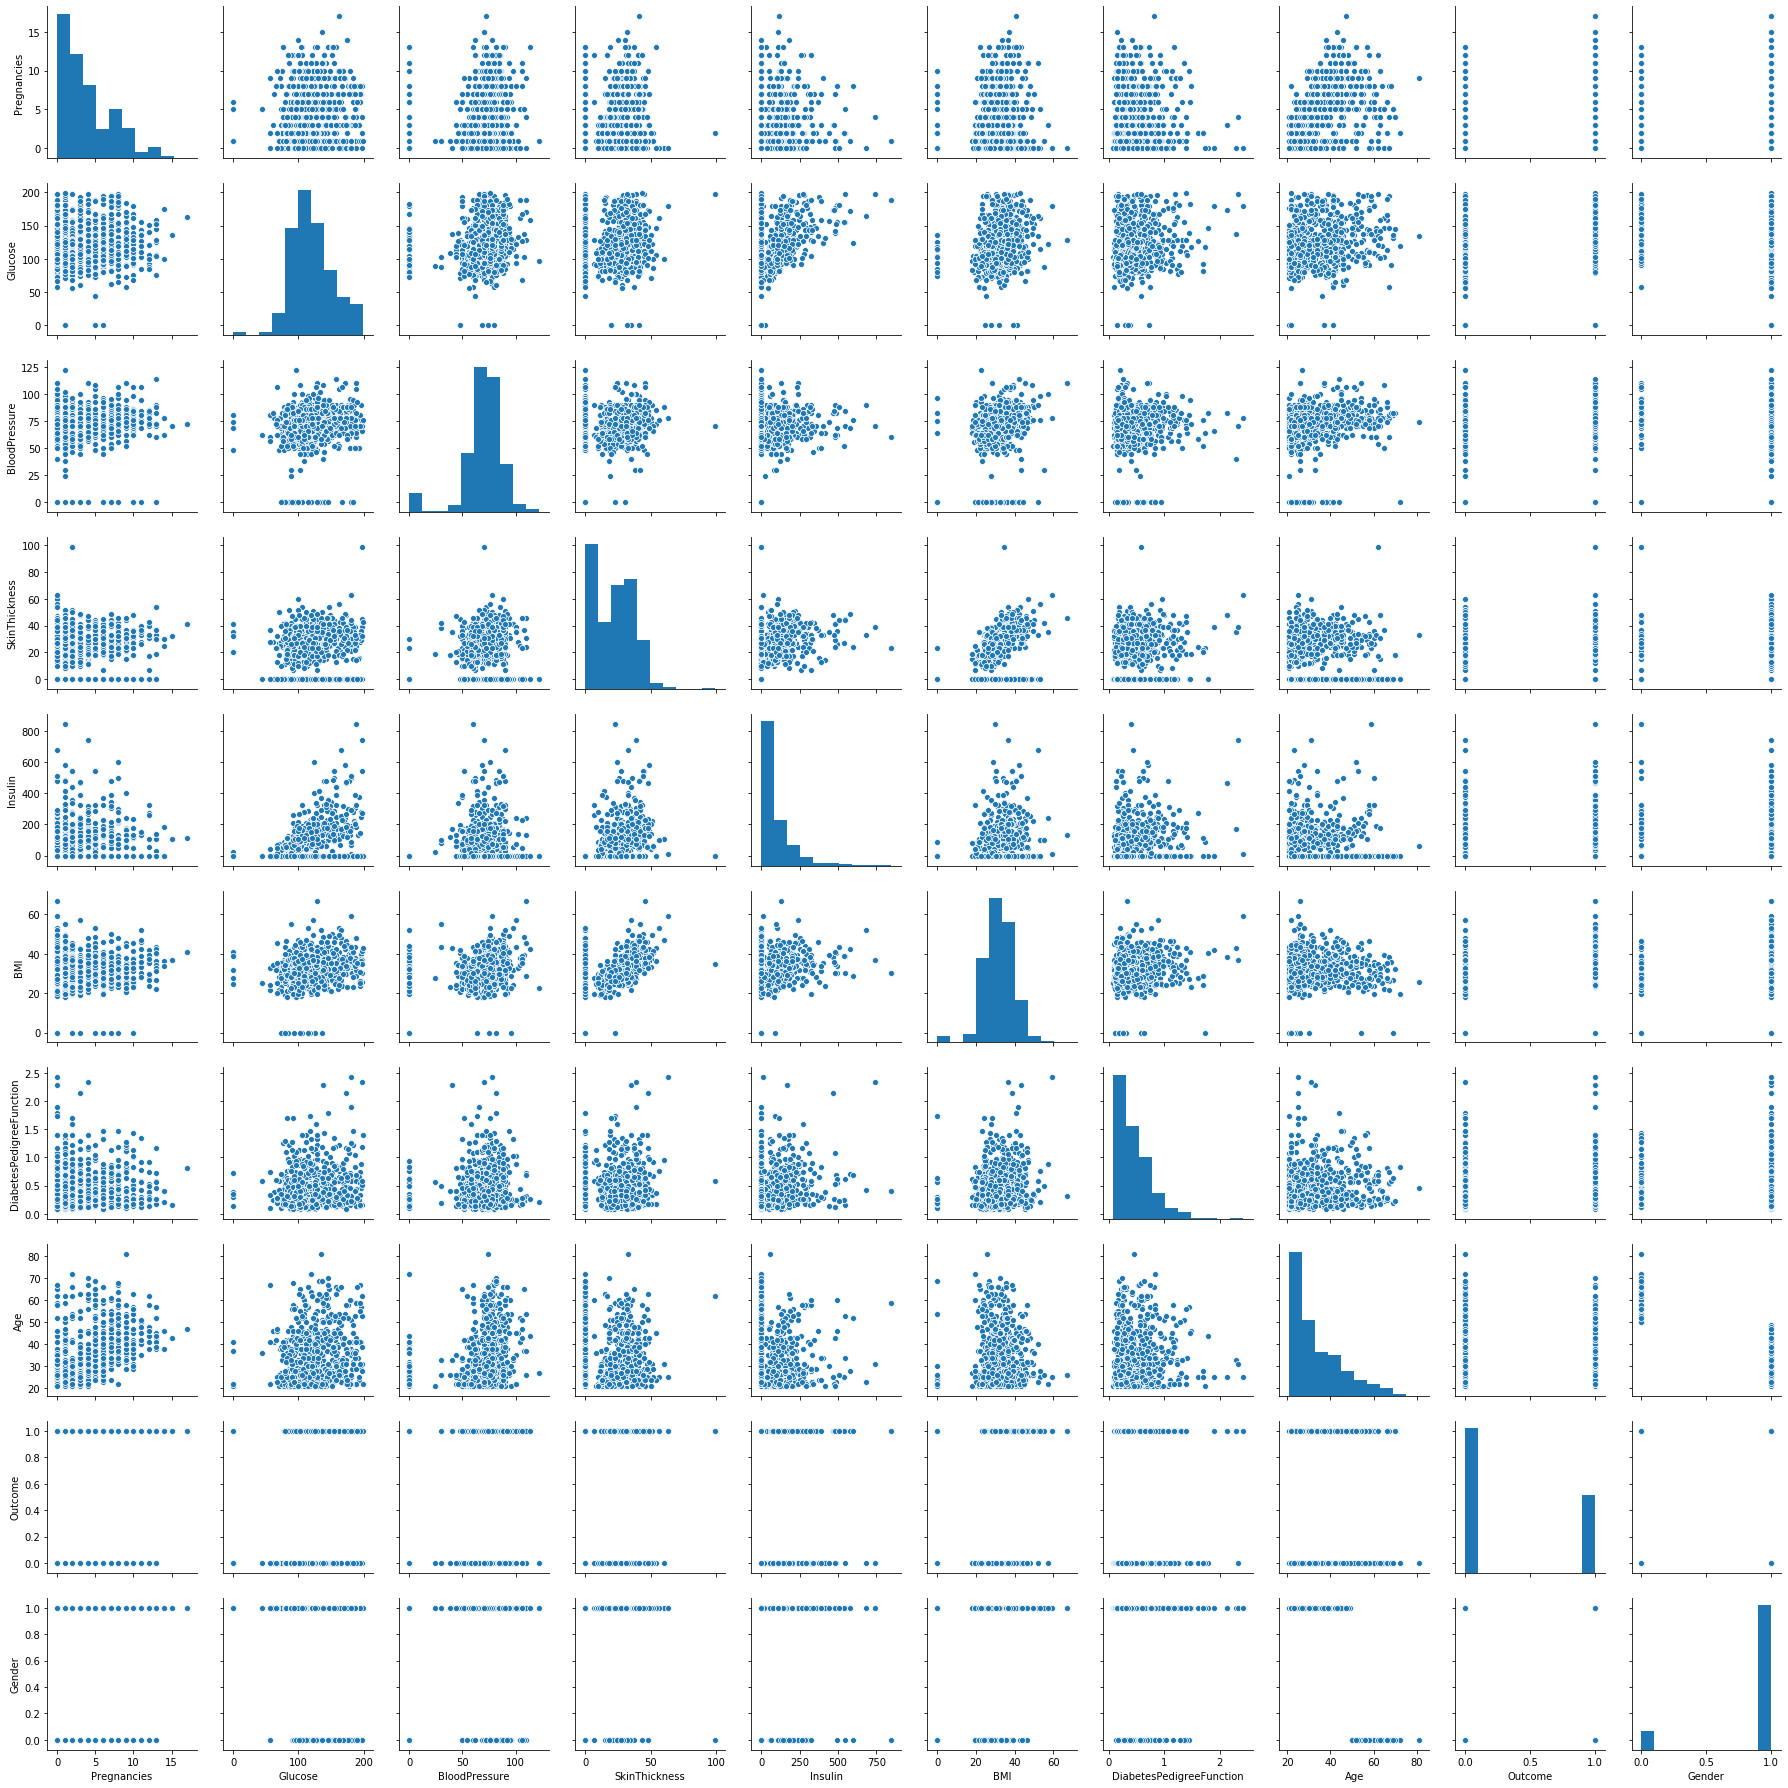

In [285]:
plt.figure(figsize=(20,8))
sns.pairplot(data)
plt.show()

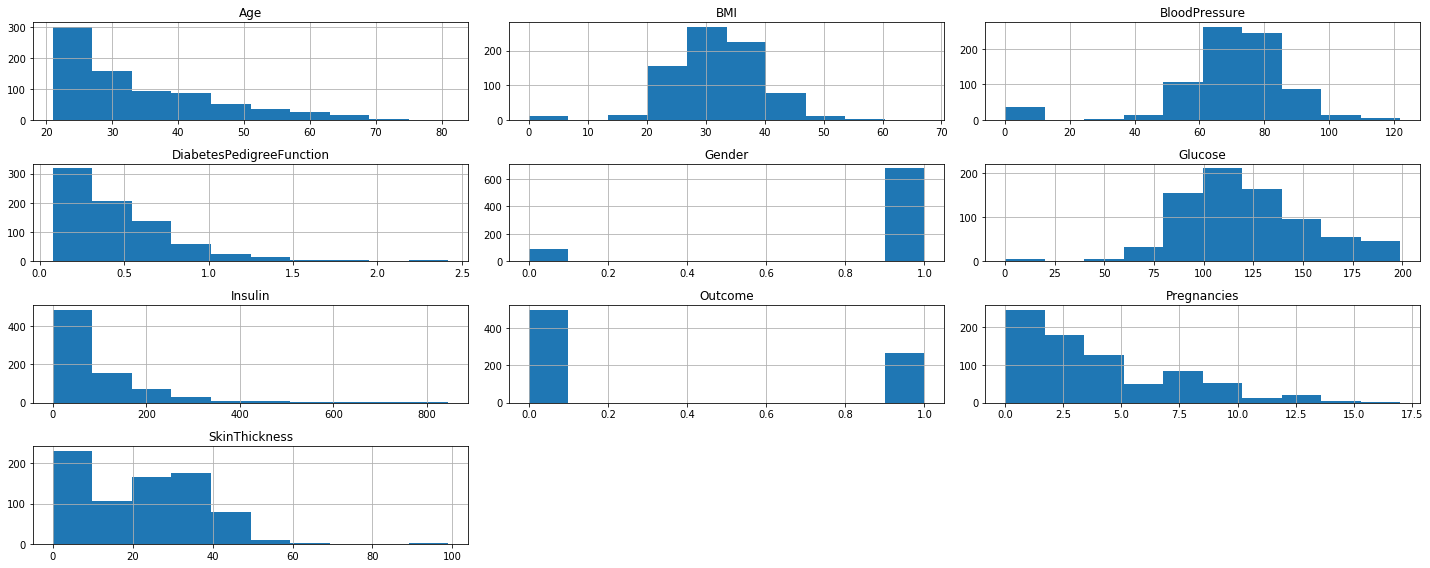

In [286]:
fig,ax = plt.subplots(figsize=(20,8))
data.hist(ax=ax)
plt.tight_layout()
plt.show()

**Implement the Beuroliie also but did not get the good accuarcy.**

In [287]:
Bur = BernoulliNB()
Bur.fit(x_train_res,y_train_res)
Y_predict= Bur.predict(x_test)
print('Accuarcy :',accuracy_score(y_test,Y_predict)*100)

Accuarcy : 61.038961038961034


**Apply the feature engineering To get the requred Good Accuarcy.**

In [288]:
corrmat = data.corr()
corrmat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,-0.235312
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,-0.211390
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,-0.173417
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.110424
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.013593
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.077671
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,-0.029326
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,-0.756485
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,-0.101925
Gender,-0.235312,-0.211390,-0.173417,0.110424,-0.013593,0.077671,-0.029326,-0.756485,-0.101925,1.000000


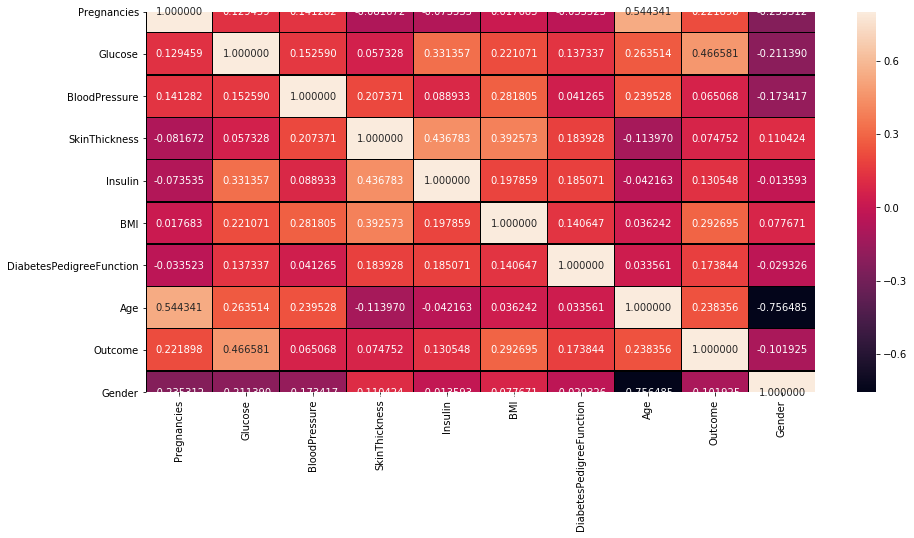

In [289]:
plt.figure(figsize=(15,7))
sns.heatmap(corrmat,vmax=0.8,linecolor='black',linewidths=0.4,fmt='f',annot=True)
plt.show()

### Use the Chi2 Test.

In [290]:
X.shape

(768, 7)

In [291]:
x_train_res.shape,x_test.shape

((800, 9), (154, 9))

In [292]:
chi2_score,chi2_pvalues = chi2(x_train_res,y_train_res)

In [293]:
chi2_pvalues = pd.Series(chi2_pvalues,index=x_train_res.columns)

In [294]:
chi2_pvalues.sort_values(ascending=False,inplace=True)

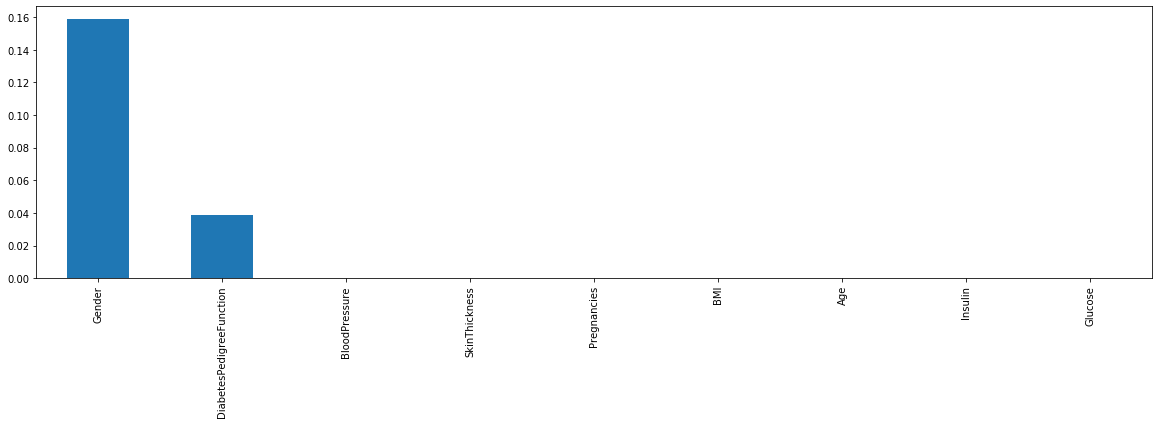

In [295]:
plt.figure(figsize=(20,5))
chi2_pvalues.plot(kind='bar')
plt.show()

In [296]:
sel = SelectKBest(chi2,k=8)

In [297]:
sel.fit(x_train_res,y_train_res)

SelectKBest(k=8, score_func=<function chi2 at 0x0C905ED0>)

In [298]:
features = x_train_res.columns[sel.get_support()]
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [299]:
X_train = sel.transform(x_train_res)
X_test  = sel.transform(x_test)

In [300]:
X_train.shape,X_test.shape

((800, 8), (154, 8))

In [301]:
scaler = StandardScaler()

In [302]:
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled  = scaler.transform(X_test)

In [303]:
model = GaussianNB()
model.fit(X_train_scalled,y_train_res)
Y_prediction = model.predict(X_test_scalled)
print('Accuarcy of the model',accuracy_score(y_test,Y_prediction))

Accuarcy of the model 0.7207792207792207


In [304]:
val_score = cross_val_score(GaussianNB(),X_train_scalled,y_train_res,cv=10).mean()*100

In [305]:
print('Validation Score :-',val_score)

Validation Score :- 73.125


### AUC_ROC Curve

In [306]:
from plotnine import aes,geom_abline,geom_line,ggtitle,geom_area,ggplot,ggtitle

In [307]:
prob_prediction = model.predict_proba(X_test_scalled)[:,1]

In [308]:
fpr,tpr,thresh= roc_curve(y_test,prob_prediction)

In [309]:
roc_data = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [310]:
auc = auc(fpr,tpr)

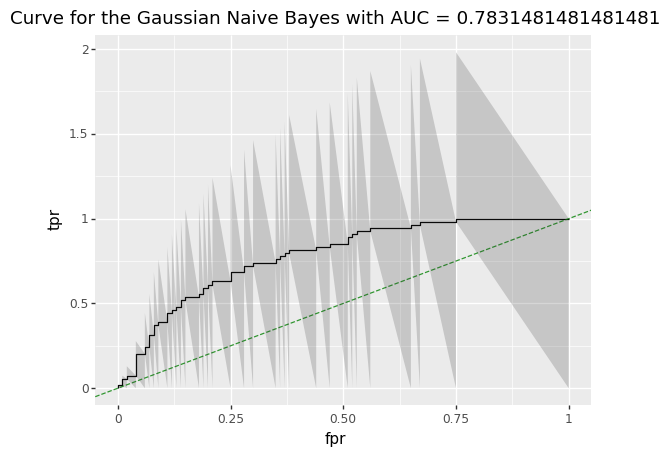

<ggplot: (10296763)>

In [311]:
ggplot(roc_data,aes(x='fpr',y='tpr'))+geom_line()+geom_abline(alpha=0.8,color='green',linetype='dashed')+geom_area(alpha=0.2)+ggtitle('Curve for the Gaussian Naive Bayes with AUC = {}'.format(auc))

In [312]:
mat =confusion_matrix(y_test,y_pred)
mat

array([[77, 23],
       [21, 33]], dtype=int64)

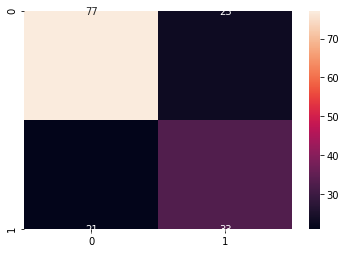

In [314]:
plt.figure(figsize=(6,4))
sns.heatmap(mat,annot=True,fmt='d')
plt.show()

In [315]:
print(classification_report(y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       100
           1       0.58      0.72      0.64        54

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



In [317]:
dataframe = pd.DataFrame({'Y_actual':y_test,'Y_predicted':Y_prediction})

In [318]:
dataframe.head()

,Y_actual,Y_predicted
44,0,1
672,0,1
700,0,0
630,1,0
81,0,0


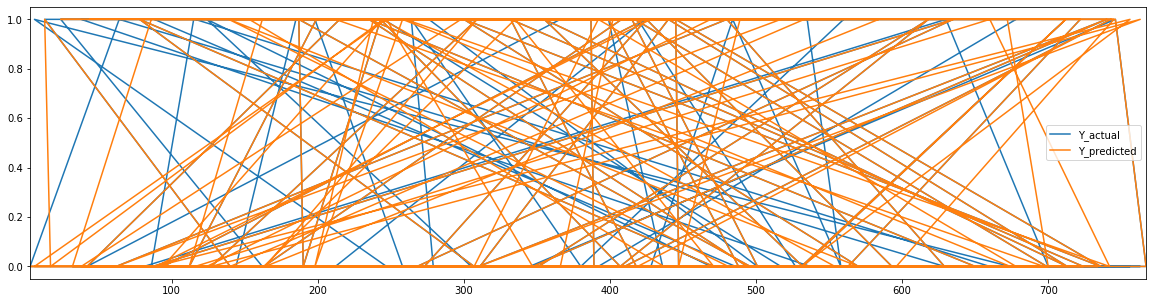

In [326]:
fig,ax=plt.subplots(figsize=(20,5))
dataframe.plot(ax=ax)
plt.show()

### Thank You !!